In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Train.csv")

In [ ]:
df.shape

(40000, 2)

In [ ]:
df.head()

,review,label
0,mature intelligent and highly charged melodram...,pos
1,http://video.google.com/videoplay?docid=211772...,pos
2,Title: Opera (1987) Director: Dario Argento Ca...,pos
3,I think a lot of people just wrote this off as...,pos
4,This is a story of two dogs and a cat looking ...,pos


In [ ]:
df['label'].value_counts()

pos    20011
neg    19989
Name: label, dtype: int64

In [ ]:
df.isnull().sum()

review    0
label     0
dtype: int64

In [ ]:
y=df['label']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [ ]:
y[:100]

array([1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
df['label']=y

In [ ]:
df.head()

,review,label
0,mature intelligent and highly charged melodram...,1
1,http://video.google.com/videoplay?docid=211772...,1
2,Title: Opera (1987) Director: Dario Argento Ca...,1
3,I think a lot of people just wrote this off as...,1
4,This is a story of two dogs and a cat looking ...,1


In [ ]:
df['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [ ]:
df['review'][5]

'Steve Carell comes into his own in his first starring role in the 40 Year Old Virgin, having only had supporting roles in such films as Bewitched, Bruce Almighty, Anchorman, and his work on the Daily Show, we had only gotten a small taste of the comedy that Carell truly makes his own. You can tell that Will Ferrell influenced his "comedic air" but Carell takes it to another level, everything he does is innocent, lovable, and hilarious. I would not hesitate to say that Steve Carell is one of the next great comedians of our time.<br /><br />The 40 Year Old Virgin is two hours of non-stop laughs (or 4 hours if you see it twice like I did), a perfect supporting cast and great leads charm the audience through the entire movie. The script was perfect with so many great lines that you will want to see the movie again just to try to remember them all. The music fit the tone of the movie great, and you can tell the director knew what he was doing.<br /><br />Filled with sex jokes, some nudity,

We can observe that this dataset has been scraped from the internet and it includes extra tags like < br >< br >, other links and special characters.

In [ ]:
import re
from nltk.corpus import stopwords

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
import nltk
nltk.download('stopwords')
sw=set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def clean_text(review):

  #convert all letters to lowercase
  review=review.lower()

  #remove <br><br> tags
  review=review.replace('<br /><br />','')

  #replace all non-alphabetical characters with white space
  review=re.sub("[^a-zA-Z]+",' ',review)

  #split the text into words 
  review=review.strip().split(' ')

  #remove stopwords and apply lemmatizer 
  review=[lemmatizer.lemmatize(x) for x in review if x not in sw]

  return review

In [ ]:
df['review'][1]

'http://video.google.com/videoplay?docid=211772166650071408&hl=en Distribution was tried.<br /><br />We opted for mass appeal.<br /><br />We want the best possible viewing range so, we forgo profit and continue our manual labor jobs gladly to entertain you for working yours.<br /><br />View Texas tale, please write about it... If you like it or not, if you like Alex or not, if you like Stuie, Texas or Texas tale... Just write about it.<br /><br />Your opinion rules.'

In [ ]:
clean_text(df['review'][1])

['http',
 'video',
 'google',
 'com',
 'videoplay',
 'docid',
 'hl',
 'en',
 'distribution',
 'tried',
 'opted',
 'mass',
 'appeal',
 'want',
 'best',
 'possible',
 'viewing',
 'range',
 'forgo',
 'profit',
 'continue',
 'manual',
 'labor',
 'job',
 'gladly',
 'entertain',
 'working',
 'view',
 'texas',
 'tale',
 'please',
 'write',
 'like',
 'like',
 'alex',
 'like',
 'stuie',
 'texas',
 'texas',
 'tale',
 'write',
 'opinion',
 'rule']

In [ ]:
df['clean_reviews']=df['review'].apply(clean_text)

In [ ]:
df['clean_reviews'].head()

0    [mature, intelligent, highly, charged, melodra...
1    [http, video, google, com, videoplay, docid, h...
2    [title, opera, director, dario, argento, cast,...
3    [think, lot, people, wrote, another, one, tom,...
4    [story, two, dog, cat, looking, way, back, hom...
Name: clean_reviews, dtype: object

Split dataset into train and test

In [ ]:
from sklearn.model_selection import train_test_split
X=df['clean_reviews']
y=df['label']

train_reviews,test_reviews,ytrain,ytest=train_test_split(X,y,stratify=y,test_size=0.25)

word2vec embeddings on train reviews

In [ ]:
from gensim.models import word2vec

num_features=100
min_word_count=5
num_workers=3

model = word2vec.Word2Vec(train_reviews,workers=num_workers,size=num_features,min_count=min_word_count)

In [ ]:
model.save("w2vmodel")

In [ ]:
model.wv.most_similar("movie")

[('film', 0.7729233503341675),
 ('flick', 0.6932280659675598),
 ('sequel', 0.5655446648597717),
 ('sure', 0.5652586221694946),
 ('figured', 0.5613445043563843),
 ('thats', 0.554740846157074),
 ('suppose', 0.5453314781188965),
 ('rubbish', 0.5381800532341003),
 ('anyway', 0.534386157989502),
 ('anyways', 0.5316417217254639)]

In [ ]:
model.wv.syn0.shape

<ipython-input-40-b77a3a51ff8b>:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  model.wv.syn0.shape


(27997, 100)

In [ ]:
def featureVecMethod(words, model, num_features):
  
    featureVec = np.zeros(num_features,dtype="float32")
    nwords = 0
  
    index2word_set = set(model.wv.index2word)
    
    for word in  words:
        if word in index2word_set:
            nwords = nwords + 1
            featureVec = np.add(featureVec,model[word])
    
    # Dividing the result by number of words to get average
    featureVec = np.divide(featureVec, nwords)
    
    return featureVec

In [ ]:
def getAvgFeatureVecs(reviews, model, num_features):
    counter = 0
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    for review in reviews:
        # Printing a status message every 1000th review
        if counter%1000 == 0:
            print("Review %d of %d"%(counter,len(reviews)))
            
        reviewFeatureVecs[counter] = featureVecMethod(review, model, num_features)
        counter = counter+1
        
    return reviewFeatureVecs

In [ ]:
trainDataVecs = getAvgFeatureVecs(train_reviews, model, num_features)

Review 0 of 30000


<ipython-input-41-f729684ed2ca>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])


Review 1000 of 30000
Review 2000 of 30000
Review 3000 of 30000
Review 4000 of 30000
Review 5000 of 30000
Review 6000 of 30000
Review 7000 of 30000
Review 8000 of 30000
Review 9000 of 30000
Review 10000 of 30000
Review 11000 of 30000
Review 12000 of 30000
Review 13000 of 30000
Review 14000 of 30000
Review 15000 of 30000
Review 16000 of 30000
Review 17000 of 30000
Review 18000 of 30000
Review 19000 of 30000
Review 20000 of 30000
Review 21000 of 30000
Review 22000 of 30000
Review 23000 of 30000
Review 24000 of 30000
Review 25000 of 30000
Review 26000 of 30000
Review 27000 of 30000
Review 28000 of 30000
Review 29000 of 30000


Build MLPClassifier and tune hyperparameters

In [ ]:
from sklearn.neural_network import MLPClassifier

mlp_model=MLPClassifier(max_iter=10)

parameter_space={
    'hidden_layer_sizes':[(10,),(10,15,),(25,25),(20,20,20),(10,12,15,),(10,12,15,20,)],
    'activation':['tanh','relu'],
    'alpha':[0.0001,0.01],
    }

In [ ]:
from sklearn.model_selection import GridSearchCV
clf=GridSearchCV(mlp_model, parameter_space, n_jobs=-1, cv=5)

In [ ]:
clf.fit(trainDataVecs,ytrain)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=10), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.01],
                         'hidden_layer_sizes': [(10,), (10, 15), (25, 25),
                                                (20, 20, 20), (10, 12, 15),
                                                (10, 12, 15, 20)]})

In [ ]:
df=pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_alpha,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.136387,0.028116,0.006697,0.000143,tanh,0.0001,"(10,)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.844667,0.848167,0.849667,0.861167,0.843833,0.849500,0.006219,23
1,1.871208,0.388540,0.016276,0.005941,tanh,0.0001,"(10, 15)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.849167,0.853333,0.847500,0.862167,0.848833,0.852200,0.005352,8
2,2.655318,0.881094,0.022583,0.006570,tanh,0.0001,"(25, 25)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.851833,0.854167,0.846500,0.859167,0.846500,0.851633,0.004815,16
3,2.270140,0.018002,0.022105,0.000298,tanh,0.0001,"(20, 20, 20)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.853833,0.851167,0.855833,0.862000,0.845500,0.853667,0.005424,2
4,2.889421,0.554389,0.023506,0.006816,tanh,0.0001,"(10, 12, 15)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.852000,0.852667,0.849667,0.859333,0.845667,0.851867,0.004465,14
5,2.365622,0.025896,0.020719,0.000543,tanh,0.0001,"(10, 12, 15, 20)","{'activation': 'tanh', 'alpha': 0.0001, 'hidde...",0.848000,0.853833,0.854500,0.856500,0.845000,0.851567,0.004334,18
6,1.087477,0.016512,0.006718,0.000094,tanh,0.01,"(10,)","{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.844833,0.853333,0.850500,0.861167,0.843333,0.850633,0.006406,21
7,2.461991,0.351688,0.022292,0.007437,tanh,0.01,"(10, 15)","{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.850500,0.854000,0.852667,0.859667,0.845167,0.852400,0.004719,6
8,1.931102,0.037234,0.019114,0.000266,tanh,0.01,"(25, 25)","{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.853333,0.854000,0.852833,0.861500,0.846000,0.853533,0.004919,3
9,2.558834,0.516655,0.025444,0.006345,tanh,0.01,"(20, 20, 20)","{'activation': 'tanh', 'alpha': 0.01, 'hidden_...",0.853333,0.853167,0.842500,0.861833,0.847333,0.851633,0.006499,16


In [ ]:
df[['param_hidden_layer_sizes','param_activation','param_alpha','mean_test_score','rank_test_score']]

,param_hidden_layer_sizes,param_activation,param_alpha,mean_test_score,rank_test_score
0,"(10,)",tanh,0.0001,0.849500,23
1,"(10, 15)",tanh,0.0001,0.852200,8
2,"(25, 25)",tanh,0.0001,0.851633,16
3,"(20, 20, 20)",tanh,0.0001,0.853667,2
4,"(10, 12, 15)",tanh,0.0001,0.851867,14
5,"(10, 12, 15, 20)",tanh,0.0001,0.851567,18
6,"(10,)",tanh,0.01,0.850633,21
7,"(10, 15)",tanh,0.01,0.852400,6
8,"(25, 25)",tanh,0.01,0.853533,3
9,"(20, 20, 20)",tanh,0.01,0.851633,16


In [ ]:
clf.best_estimator_

MLPClassifier(hidden_layer_sizes=(25, 25), max_iter=10)

In [ ]:
testDataVecs=getAvgFeatureVecs(test_reviews, model, num_features)

Review 0 of 10000


<ipython-input-41-f729684ed2ca>:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  featureVec = np.add(featureVec,model[word])


Review 1000 of 10000
Review 2000 of 10000
Review 3000 of 10000
Review 4000 of 10000
Review 5000 of 10000
Review 6000 of 10000
Review 7000 of 10000
Review 8000 of 10000
Review 9000 of 10000


In [ ]:
ypred=clf.predict(testDataVecs)

Accuracy : 0.85
Precision: 0.82
Recall   : 0.90
f1_score : 0.86


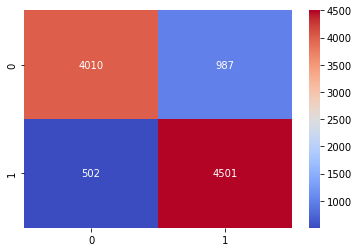

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score

print("Accuracy : %.2f"%accuracy_score(ytest,ypred))
print("Precision: %.2f"%precision_score(ytest,ypred))
print("Recall   : %.2f"%recall_score(ytest,ypred))
print("f1_score : %.2f"%f1_score(ytest,ypred))

cf=confusion_matrix(ytest,ypred)
sns.heatmap(cf,annot=True,fmt='d',cmap='coolwarm')